As [noted by Kagglers](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/discussion/33375#190027), there was an issue with the new tif files in the updated test data set. These files are named "file_XXXX.tif", and the corresponding jpg and tif files have been out of sync. So `file_10.jpg` doesn't look anything like `file_10.tif`. For the curious, this was caused by overaggressive filename randomization. [facepalm]

This kernel highlights the issue, and shows how to fix it using the new `test_v2_file_mapping.csv`. No need to download data again! N.B. you could also easily just use `test_v2_file_mapping.csv` and shell commands to manipulate the files.

Thanks to @hengck23 and others for pointing this out. And thanks for bearing with us as we investigated and fixed it.

In [1]:
!ls ../input

sample_submission_v2.csv  test-tif-v2		    train-jpg	  train_v2.csv
test-jpg-v2		  test_v2_file_mapping.csv  train-tif-v2


In [2]:
!head ../input/test_v2_file_mapping.csv

In [3]:
import os
import shutil
import random

import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from spectral import imshow

%matplotlib inline

In [4]:
BASEPATH = '/kaggle/input'
WORKING = '/kaggle/working'

CSVPATH = os.path.join(BASEPATH, 'test_v2_file_mapping.csv')
JPGPATH = os.path.join(BASEPATH, 'test-jpg-v2')
TIFPATH = os.path.join(BASEPATH, 'test-tif-v2')

FIXEDPATH = os.path.join(WORKING, 'fixed')

This function is all you'll really need. When you're trying this on your computer you don't need the throttling provided by `num_files`.

In [5]:
def copy_and_rename(num_files=500):
    '''Copy up to `num_files` images to the scratch directory.
    `num_files` is needed because you can only write a few hundred
    megabytes in this kernel environment. Use the `df -h` command
    to check.
    
    This is a purposely non-destructive operation. You'll need to
    move the renamed files back to the test-tif-v2 directory so
    that your existing scripts will continue to work.
    '''
    n = 0

    if not os.path.exists(FIXEDPATH):
        os.mkdir(FIXEDPATH)

    for index, row in df.iterrows():
        old = os.path.join(TIFPATH, row['old'])
        new = os.path.join(FIXEDPATH, row['new'])
        shutil.copy(old, new)
        n += 1
        if n % 500 == 0:
            print('Copied {}'.format(n))
        # Remove the following lines to unleash the full power of
        # this kernel and copy & rename all the misnamed tif files!
        if n == num_files:
            print('Copied {} files as requested'.format(n))
            break

That's it for copy + rename. The final bit of cleanup moves the files back into the test-tif-v2 directory.

The following shell commands should do the trick, BUT THIS HAS NOT BEEN TESTED because I can't write to this part of the kernel filesystem.

It should move existing file_***.tif files to a backup location, then move the renamed tifs to test-tif-v2.

DO NOT COPY/PASTE THESE SAMPLE COMMANDS INTO YOUR TERMINAL! THEY HAVE NOT BEEN TESTED, AND YOU NEED TO ADAPT THEM TO YOUR COMPUTER & DIRECTORY STRUCTURE. THESE ARE ONLY SAMPLE COMMANDS, AND THEY PROBABLY WON'T WORK ON WINDOWS.

    mkdir /tmp/backup
    mv ../input/test-tif-v2/file_*.tif /tmp/backup/
    cp ./fixed/file_*.tif ../input/test-tif-v2/

Read on for more background on this, an example of how to use the function, and examples of the fix.

In [6]:
df = pd.read_csv(CSVPATH)

Let's look at the csv file. It's pretty simple, just a mapping from the `old` filename to the `new` one. As mentioned above, the "old" filenames were randomized one too many times, so they got out of sync with the jpg files.

In [7]:
df

,old,new
0,file_4158.tif,file_18830.tif
1,file_1668.tif,file_19164.tif
2,file_2411.tif,file_15749.tif
3,file_16047.tif,file_7531.tif
4,file_1271.tif,file_18347.tif
5,file_5652.tif,file_11838.tif
6,file_15144.tif,file_2349.tif
7,file_4714.tif,file_7479.tif
8,file_16364.tif,file_6613.tif
9,file_4974.tif,file_16062.tif


In [8]:
def load_img(fname, tifpath, jpgpath):
    # Load the tif and extract the blue, green and red bands
    # (the bands are ordered by wavelength, the way Landsat
    # bands are). Then re-order the arrays so that we can
    # view them in the standard RGB band combination.
    if 'tif' in fname:
        path = os.path.join(tifpath, fname)
        img = io.imread(path)
        bgr = img[:,:,:3]
        rgb = bgr[:, :, [2,1,0]]
        return rgb
    else:
        path = os.path.join(jpgpath, fname)
        img = io.imread(path)
        return img


def show_img(fname, tifpath=TIFPATH, jpgpath=JPGPATH):
    img = load_img(fname, tifpath, jpgpath)

    # use spectral to view tif files
    if 'tif' in fname:
        imshow(img)
    # otherwise use standard matplotlib to view jpgs
    else:
        plt.figure()
        plt.imshow(img)

Ok, so now we can look at images easily. These images should look similar (given all the usual caveats about the differences between jpg and tif files in Planet imagery). The original test images - `test_***.tif` match the jpgs just fine.

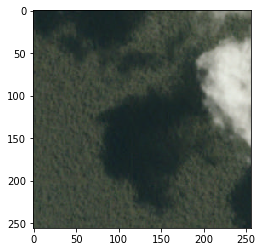

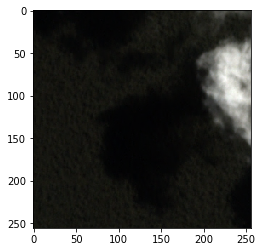

In [9]:
show_img('test_10.jpg')
show_img('test_10.tif')

But the files with the "file_" prefix are mixed up.

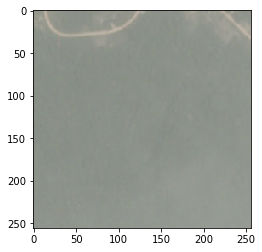

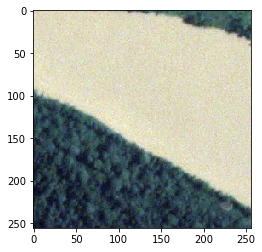

In [10]:
show_img('file_10.jpg')
show_img('file_10.tif')

That definitely doesn't look right. They're actually from different images altogether, but a mishap with filename randomization gave them the same name. Let's fix that.

In [11]:
copy_and_rename(100)

Copied 100 files as requested


Let's check some of the files. We can't just use "file_10.jpg" again because we only copied the first 100 of the images - again due to the available space issue. But the fixed tif filename should correspond to the original jpg.

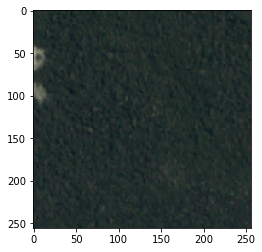

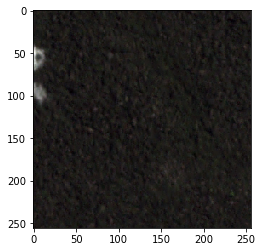

In [12]:
show_img('file_18830.jpg')
show_img('file_18830.tif', tifpath=FIXEDPATH)

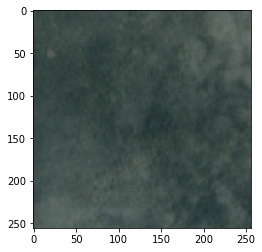

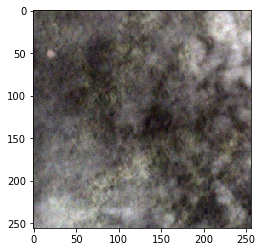

In [13]:
show_img('file_18347.jpg')
show_img('file_18347.tif', tifpath=FIXEDPATH)

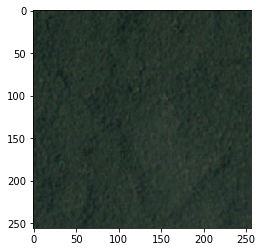

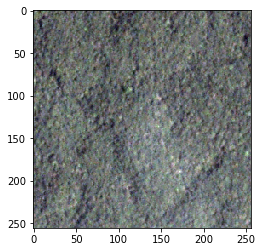

In [14]:
show_img('file_11906.jpg')
show_img('file_11906.tif', tifpath=FIXEDPATH)

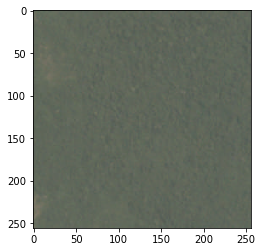

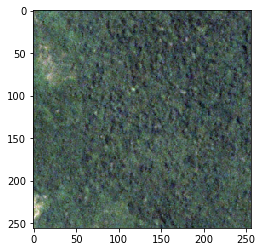

In [15]:
show_img('file_4261.jpg')
show_img('file_4261.tif', tifpath=FIXEDPATH)

And there you have it. We've fixed it. Thanks for your patience, and good luck!